LOAD DATASET ANALYSIS
Dataset Shape : (145460, 23)
Missing Values : 
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rai

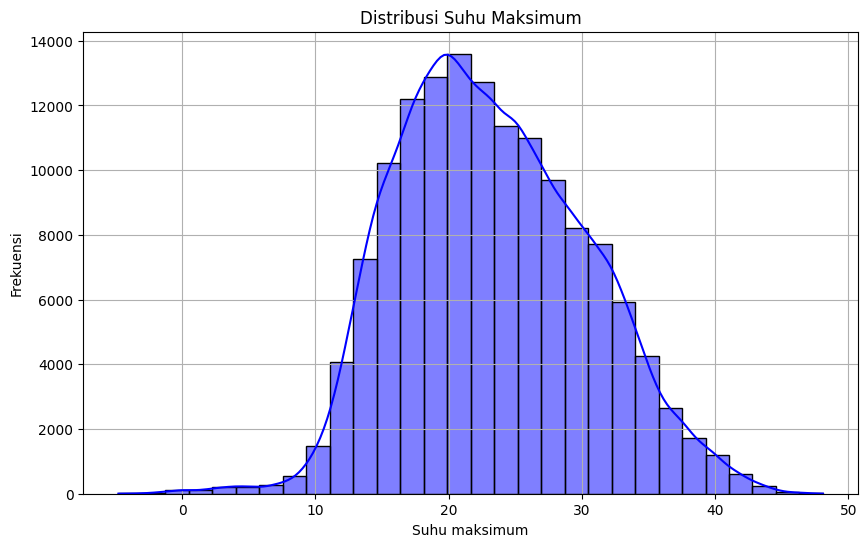

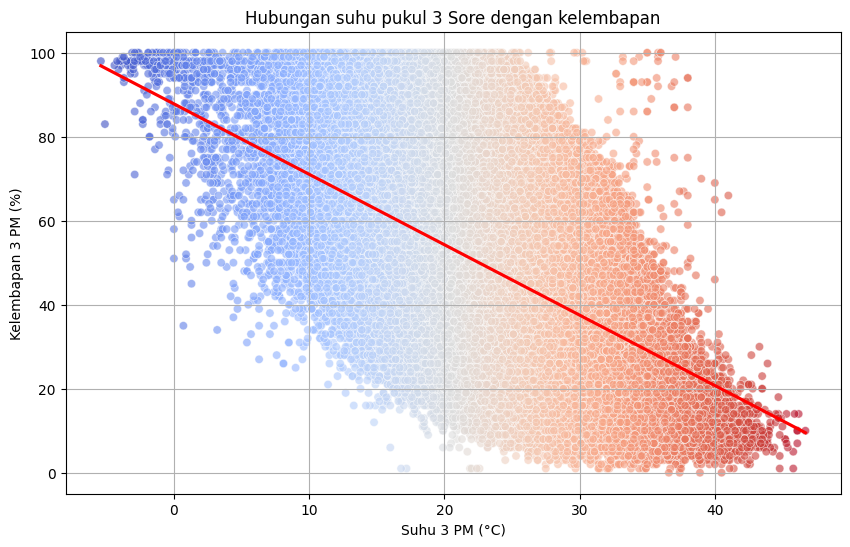

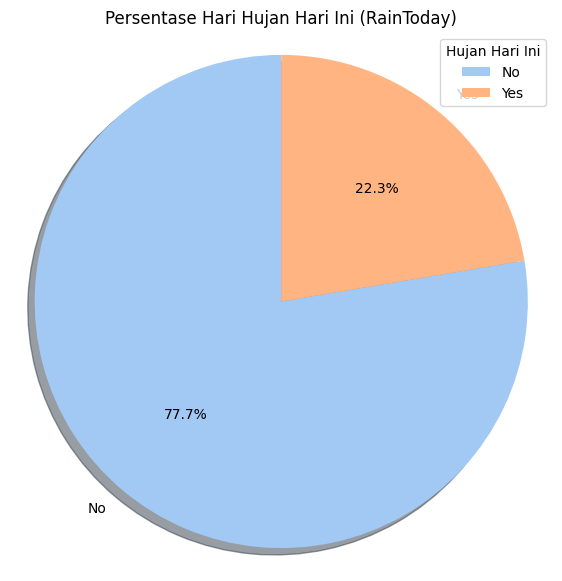

C:\Users\misba\AppData\Local\Temp\ipykernel_7452\3502020238.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=raw_df, x='RainTomorrow', palette='Set2')


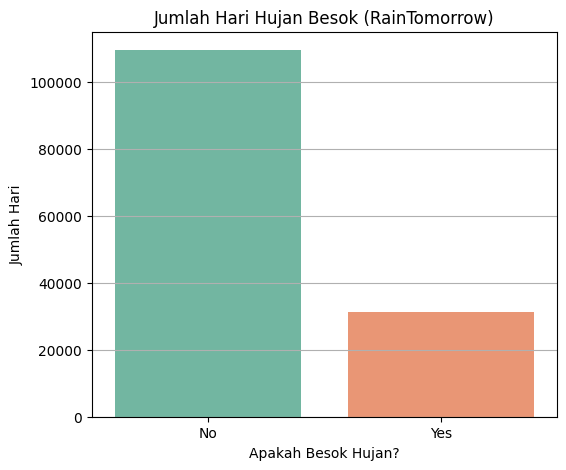

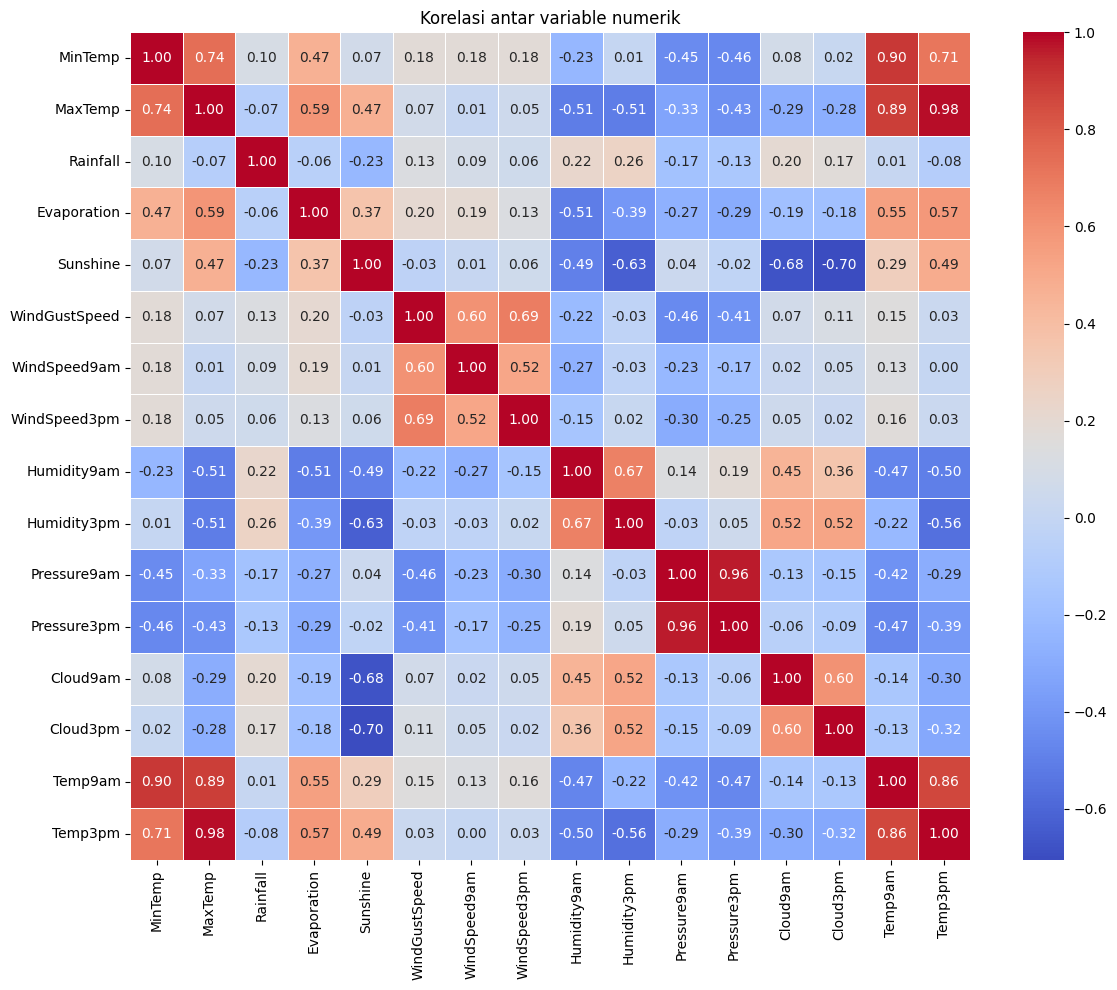

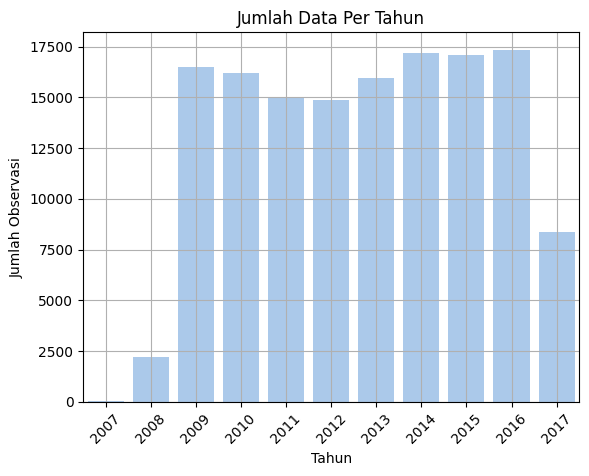

train_df.shape : (97988, 23)
val_df.shape   : (17089, 23)
test_df.shape  : (25710, 23)
Model Coefficients:
[[ 8.98631313e-01 -2.87991534e+00  3.16277797e+00  8.54245853e-01
  -1.67139390e+00  6.76440065e+00 -9.42321897e-01 -1.42842863e+00
   3.22892517e-01  5.99531536e+00  5.46385628e+00 -9.17680428e+00
  -1.62297095e-01  1.28765974e+00  4.74715135e-01  2.02143027e+00
   6.01650198e-01 -5.52482047e-01  4.78142790e-01  7.66971934e-03
   3.46814543e-01 -3.52277229e-01  1.79710726e-01  4.40486437e-01
  -1.39817863e-02  2.89438264e-02  2.58147356e-01 -2.12055746e-02
  -4.27949262e-02 -4.83141694e-01 -1.37563362e-01 -5.76059630e-01
  -7.87523487e-01 -2.55404066e-01 -3.28883934e-01 -5.69004401e-01
   8.18300210e-02  1.33825047e-02  6.41275025e-02 -9.02054551e-01
  -4.44329881e-01  8.51713158e-03 -4.60612384e-01 -4.65518114e-01
  -6.94989159e-02  1.91158759e-01  4.50475879e-01  6.08121047e-01
   4.27313870e-01 -2.83312576e-02  2.51546743e-01 -3.21605627e-01
   4.24955974e-01 -5.90373050e-02 -

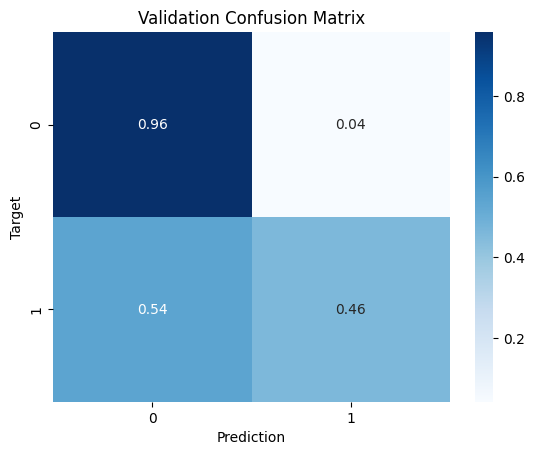

Test Accuracy: 84.20%


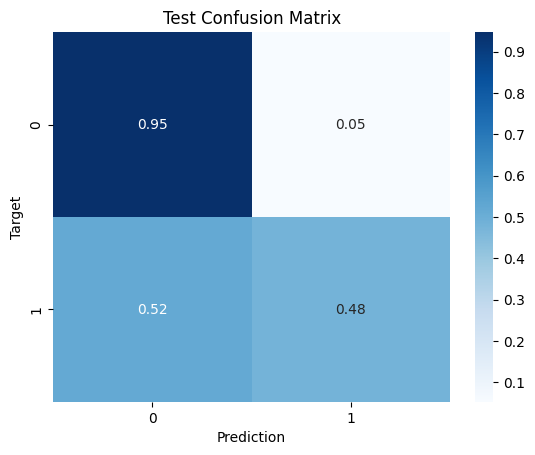

Random Guess Accuracy: 0.5026448852586543
All 'No' Accuracy    : 0.7734344612991054
Prediction: Yes, Probability: 0.52


In [33]:
# ============================ 1. Import Library ============================= #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# ============================ 2. Load Dataset ============================== #
raw_df = pd.read_csv('./data/logistic-regression/weatherAUS.csv')

print("=" * 60)
print("LOAD DATASET ANALYSIS")
print("=" * 60)
print(f"Dataset Shape : {raw_df.shape}")
print(f"Missing Values : \n{raw_df.isnull().sum()}")
raw_df.info()
print("Goals: Predict apakah akan hujan besok (RainTomorrow)")

# ============================ 3. Drop Target NA ============================ #
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

# ============================ 4. Visualisasi Awal ========================== #

# Distribusi suhu maksimum
plt.figure(figsize=(10,6))
sns.histplot(data=raw_df, x="MaxTemp", bins=30, color="blue", kde=True)
plt.title('Distribusi Suhu Maksimum')
plt.xlabel("Suhu maksimum")
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# Hubungan suhu jam 3 sore dan kelembapan
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=raw_df, x="Temp3pm", y="Humidity3pm",
    hue="Temp3pm", palette="coolwarm", alpha=0.6, legend=False
)
sns.regplot(
    data=raw_df, x="Temp3pm", y="Humidity3pm",
    scatter=False, line_kws={'color':'red'}
)
plt.title('Hubungan suhu pukul 3 Sore dengan kelembapan')
plt.xlabel('Suhu 3 PM (°C)')
plt.ylabel('Kelembapan 3 PM (%)')
plt.grid(True)
plt.show()

# Pie chart hari hujan
rain_today_counts = raw_df['RainToday'].value_counts()
plt.figure(figsize=(7, 7))
sns.set_palette("pastel")
plt.pie(rain_today_counts, labels=rain_today_counts.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Persentase Hari Hujan Hari Ini (RainToday)')
plt.axis('equal')
plt.legend(title="Hujan Hari Ini", loc="upper right")
plt.show()

# Countplot hujan besok
plt.figure(figsize=(6, 5))
sns.countplot(data=raw_df, x='RainTomorrow', palette='Set2')
plt.title('Jumlah Hari Hujan Besok (RainTomorrow)')
plt.xlabel('Apakah Besok Hujan?')
plt.ylabel('Jumlah Hari')
plt.grid(True, axis='y')
plt.show()

# Korelasi fitur numerik
numeric_cols = raw_df.select_dtypes(include='number').columns.tolist()
corr = raw_df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi antar variable numerik')
plt.tight_layout()
plt.show()

# Jumlah baris per tahun
plt.title('Jumlah Data Per Tahun')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)
plt.xlabel("Tahun")
plt.ylabel("Jumlah Observasi")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# ============================ 5. Split Data ================================ #
# Berdasarkan waktu
year = pd.to_datetime(raw_df.Date).dt.year
train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

print('train_df.shape :', train_df.shape)
print('val_df.shape   :', val_df.shape)
print('test_df.shape  :', test_df.shape)

# ============================ 6. Preprocessing ============================ #
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

# Pisah input dan target
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

# Deteksi fitur numerik dan kategorikal
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

# Imputasi nilai kosong numerik
imputer = SimpleImputer(strategy='mean')
imputer.fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

# Normalisasi (MinMaxScaler)
scaler = MinMaxScaler()
scaler.fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

# OneHot Encoding kategorikal
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(raw_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_encoded = pd.DataFrame(encoder.transform(train_inputs[categorical_cols]), columns=encoded_cols, index=train_inputs.index)
val_encoded = pd.DataFrame(encoder.transform(val_inputs[categorical_cols]), columns=encoded_cols, index=val_inputs.index)
test_encoded = pd.DataFrame(encoder.transform(test_inputs[categorical_cols]), columns=encoded_cols, index=test_inputs.index)

# Gabungkan hasil encoding
train_inputs = pd.concat([train_inputs[numeric_cols], train_encoded], axis=1)
val_inputs = pd.concat([val_inputs[numeric_cols], val_encoded], axis=1)
test_inputs = pd.concat([test_inputs[numeric_cols], test_encoded], axis=1)

# ============================ 7. Train Model ============================== #
model = LogisticRegression(solver='liblinear')
model.fit(train_inputs, train_targets)

print("Model Coefficients:")
print(model.coef_)

# ============================ 8. Evaluation =============================== #
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print(f"{name} Accuracy: {accuracy * 100:.2f}%")
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, fmt=".2f", cmap="Blues")
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    return preds

# Evaluasi Validasi dan Test
val_preds = predict_and_plot(val_inputs, val_targets, 'Validation')
test_preds = predict_and_plot(test_inputs, test_targets, 'Test')

# ============================ 9. Baseline Model =========================== #
def all_no(inputs):
    return np.full(len(inputs), "No")

def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

print("Random Guess Accuracy:", accuracy_score(test_targets, random_guess(test_inputs)))
print("All 'No' Accuracy    :", accuracy_score(test_targets, all_no(test_inputs)))

# ============================ 10. Prediksi Data Baru ====================== #
new_input = {
    'Date': '2021-06-19',
    'Location': 'Katherine',
    'MinTemp': 23.2,
    'MaxTemp': 33.2,
    'Rainfall': 10.2,
    'Evaporation': 4.2,
    'Sunshine': np.nan,
    'WindGustDir': 'NNW',
    'WindGustSpeed': 52.0,
    'WindDir9am': 'NW',
    'WindDir3pm': 'NNE',
    'WindSpeed9am': 13.0,
    'WindSpeed3pm': 20.0,
    'Humidity9am': 89.0,
    'Humidity3pm': 58.0,
    'Pressure9am': 1004.8,
    'Pressure3pm': 1001.5,
    'Cloud9am': 8.0,
    'Cloud3pm': 5.0,
    'Temp9am': 25.7,
    'Temp3pm': 33.0,
    'RainToday': 'Yes'
}

def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    encoded_input = encoder.transform(input_df[categorical_cols])
    encoded_df = pd.DataFrame(encoded_input, columns=encoded_cols, index=input_df.index)
    input_final = pd.concat([input_df[numeric_cols], encoded_df], axis=1)
    
    pred = model.predict(input_final)[0]
    prob = model.predict_proba(input_final)[0][list(model.classes_).index(pred)]
    return pred, prob

# Prediksi data baru
prediction, probability = predict_input(new_input)
print(f"Prediction: {prediction}, Probability: {probability:.2f}")


ADVANCED LOGISTIC REGRESSION ANALYSIS
Dataset Dimensi  : (145460, 23)
Variabel Target  : RainTomorrow
Total Missing    : 343248

Missing Values per Column:
               Missing_Count  Missing_Percent
Sunshine               69835        48.009762
Evaporation            62790        43.166506
Cloud3pm               59358        40.807095
Cloud9am               55888        38.421559
Pressure9am            15065        10.356799
Pressure3pm            15028        10.331363
WindDir9am             10566         7.263853
WindGustDir            10326         7.098859
WindGustSpeed          10263         7.055548
Humidity3pm             4507         3.098446
WindDir3pm              4228         2.906641
Temp3pm                 3609         2.481094
RainTomorrow            3267         2.245978
Rainfall                3261         2.241853
RainToday               3261         2.241853
WindSpeed3pm            3062         2.105046
Humidity9am             2654         1.824557
WindSpeed9am    

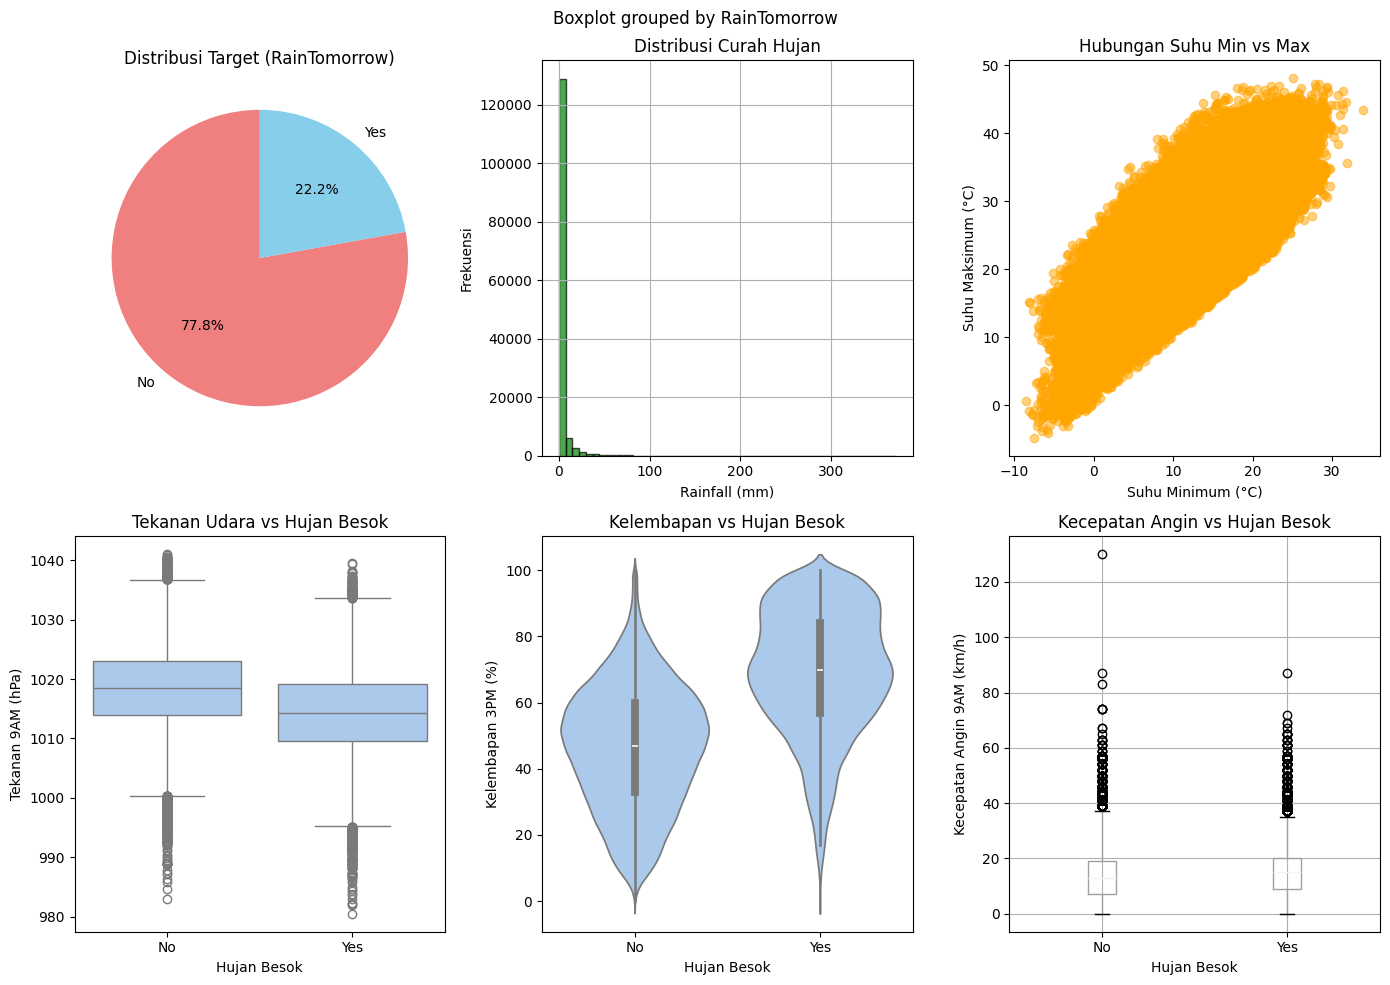

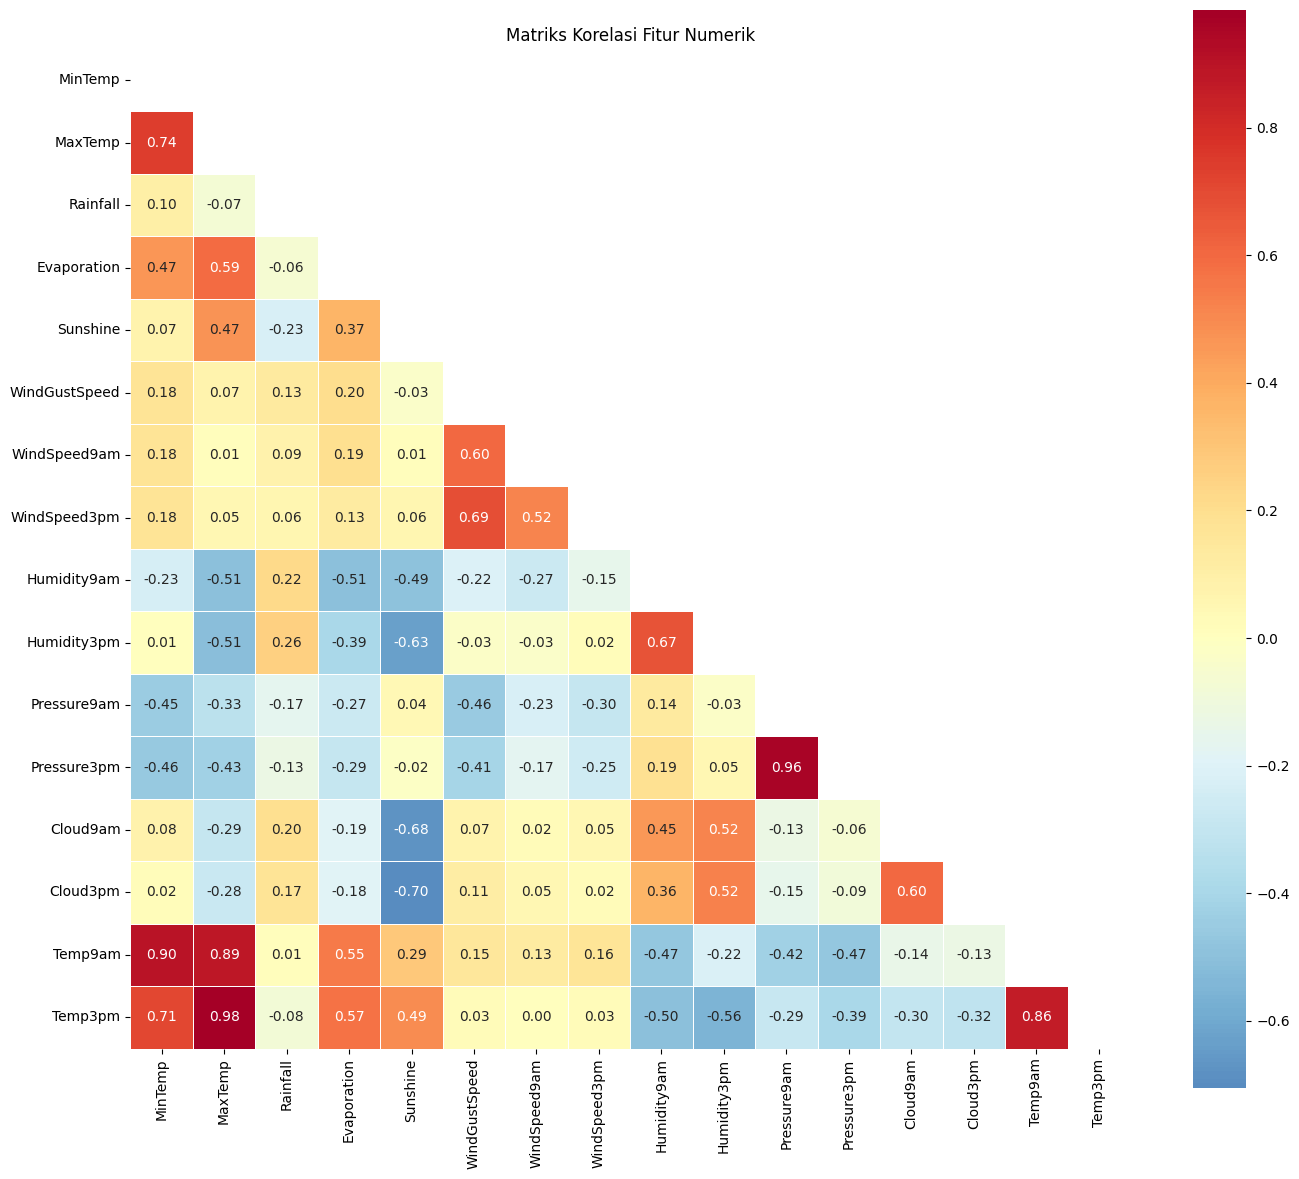

Training set   : (97988, 32)
Validation set : (17089, 32)
Test set       : (25710, 32)

Numeric features: 24
Categorical features: 6

Selected Features (15):
 1. MinTemp
 2. Rainfall
 3. Evaporation
 4. Sunshine
 5. WindGustSpeed
 6. Humidity9am
 7. Humidity3pm
 8. Pressure9am
 9. Pressure3pm
10. Cloud3pm
11. Temp9am
12. Temp3pm
13. TempRange
14. PressureDrop
15. HumidityChange

Memulai Grid Search...
Fitting 5 folds for each of 180 candidates, totalling 900 fits

Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 500, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.8692

Training Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.79      0.86     76190
         Yes       0.52      0.78      0.62     21798

    accuracy                           0.79     97988
   macro avg       0.72      0.79      0.74     97988
weighted avg       0.84      0.79      0.80     97988


Validation Classification Report:
   

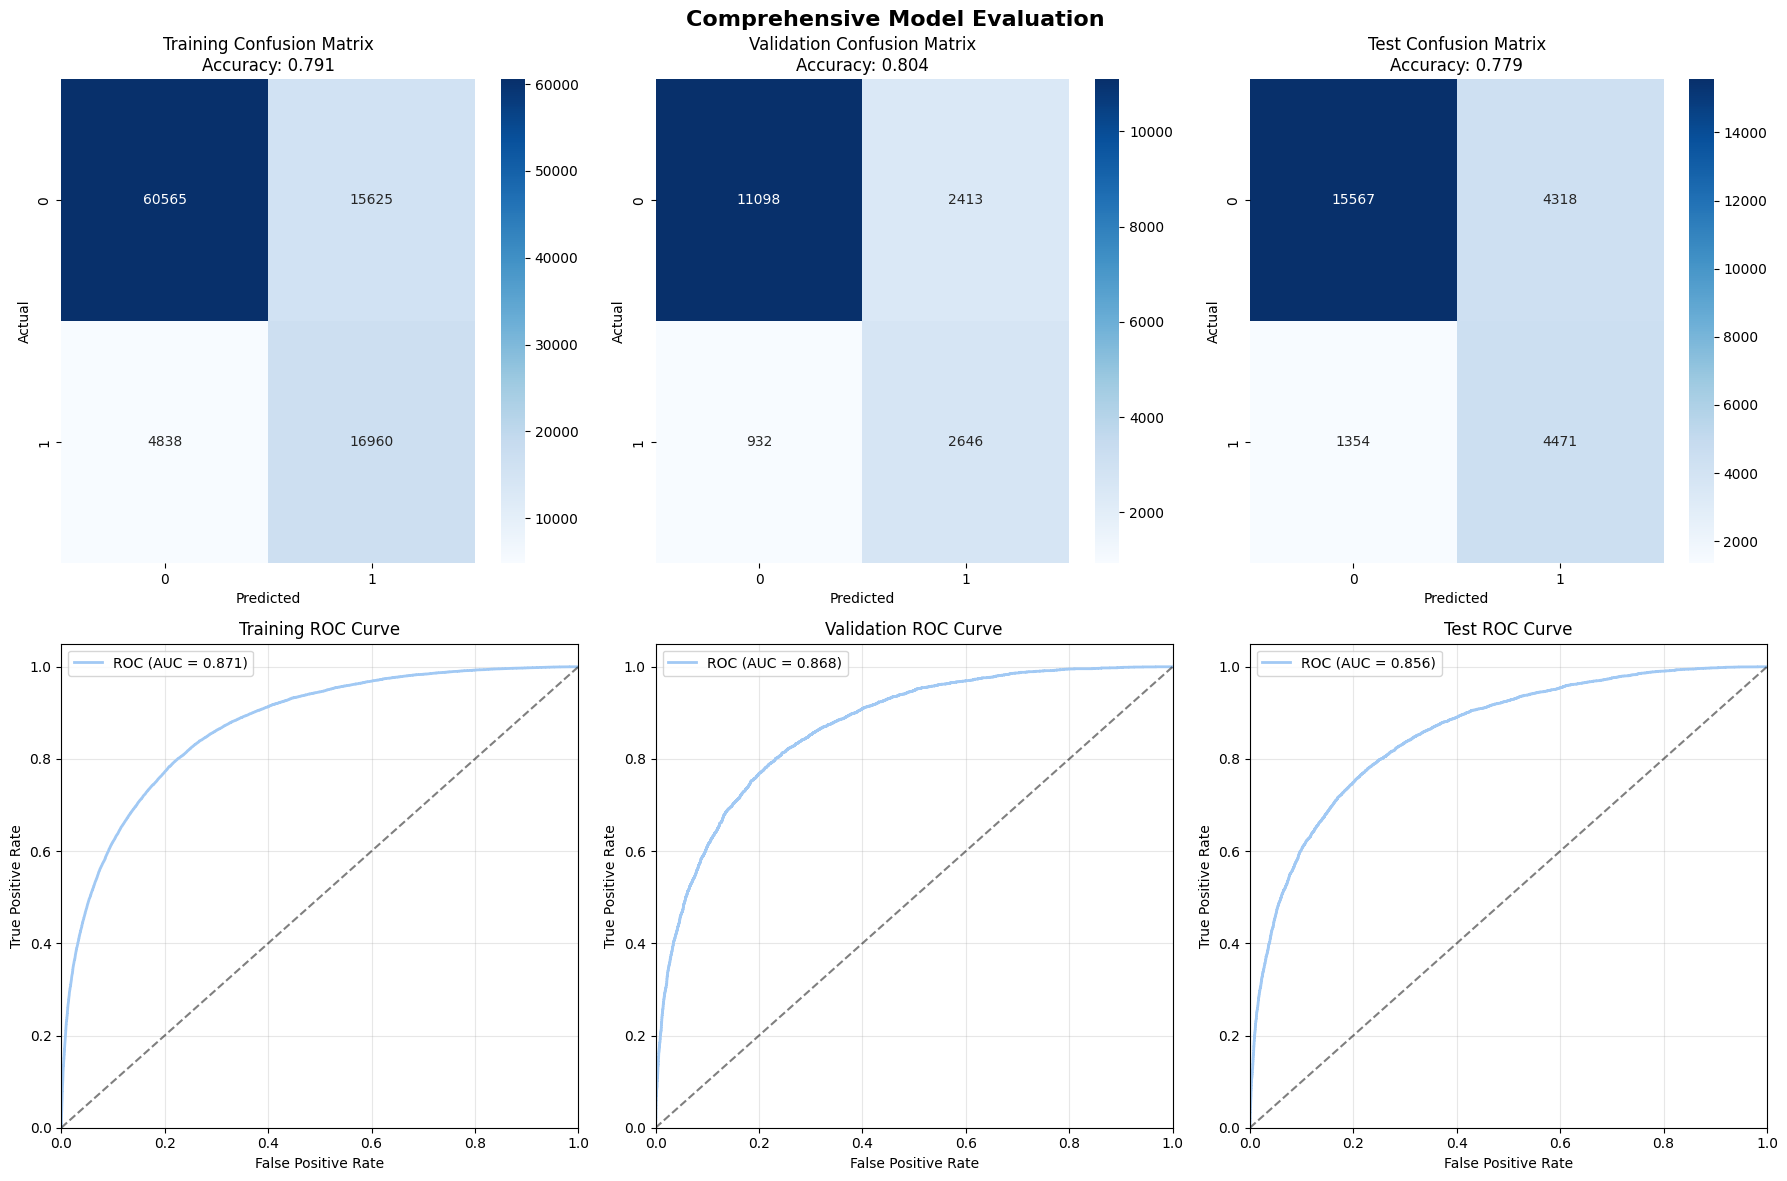

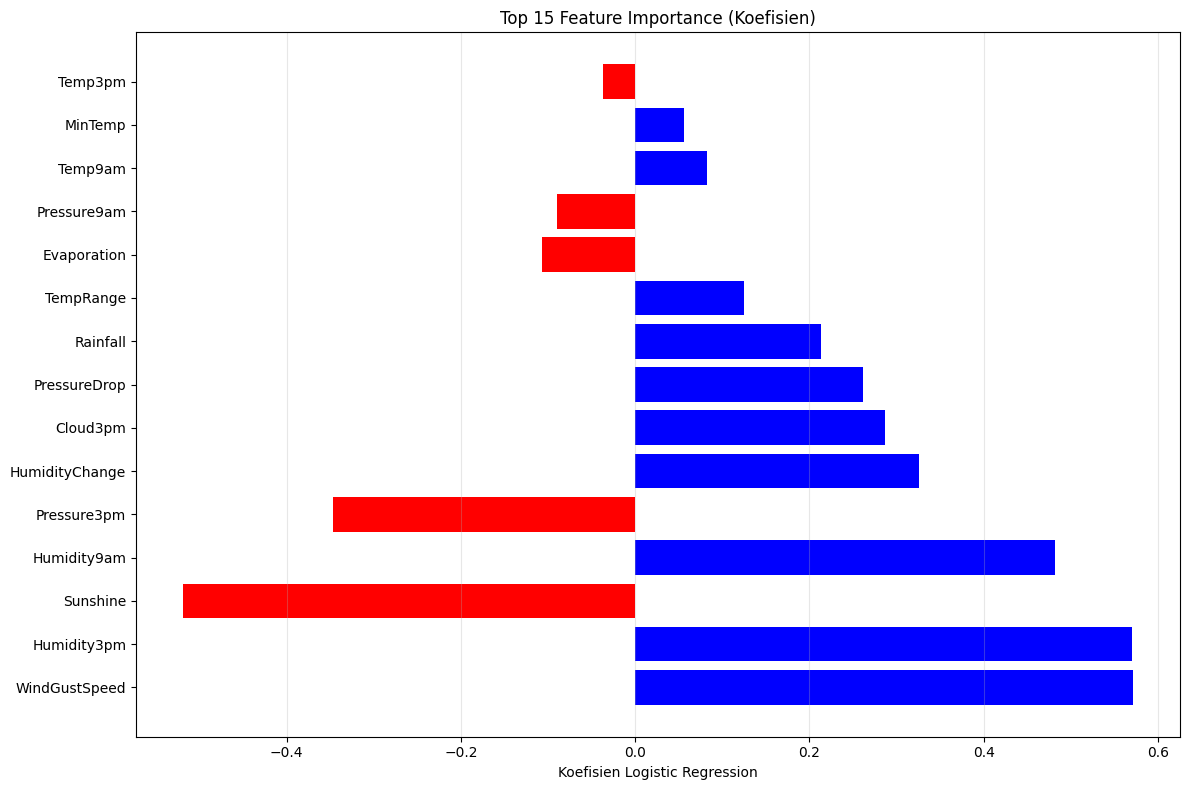


Top 10 Most Important Features:
           Feature  Coefficient  Abs_Coefficient
4    WindGustSpeed     0.570889         0.570889
6      Humidity3pm     0.570796         0.570796
3         Sunshine    -0.518443         0.518443
5      Humidity9am     0.482105         0.482105
8      Pressure3pm    -0.346260         0.346260
14  HumidityChange     0.325337         0.325337
9         Cloud3pm     0.286210         0.286210
13    PressureDrop     0.261618         0.261618
1         Rainfall     0.213152         0.213152
12       TempRange     0.124629         0.124629

MODEL COMPARISON
Model                Accuracy     AUC       
---------------------------------------------
Majority Class       0.773        0.500     
Random               0.613        0.504     
Logistic Regression  0.779        0.856     

PREDIKSI CUACA BARU
Input Date: 2021-08-15
Location: Sydney
Rain Today: Yes

Prediction: Yes
Confidence: 0.638
Probability No Rain: 0.362
Probability Rain: 0.638

RINGKASAN MODEL
Best

In [34]:
# ============================ 1. Import Library ============================= #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

# ============================ 2. Load Dataset ============================== #
data = pd.read_csv('./data/logistic-regression/weatherAUS.csv')

print("=" * 70)
print("ADVANCED LOGISTIC REGRESSION ANALYSIS")
print("=" * 70)
print(f"Dataset Dimensi  : {data.shape}")
print(f"Variabel Target  : RainTomorrow")
print(f"Total Missing    : {data.isnull().sum().sum()}")
print("\nMissing Values per Column:")
missing_data = data.isnull().sum()
missing_percent = (missing_data / len(data)) * 100
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percent': missing_percent
}).sort_values('Missing_Percent', ascending=False)
print(missing_summary[missing_summary['Missing_Count'] > 0])

# ============================ 3. Data Cleaning ========================== #
# Hapus baris dengan target yang kosong
data = data.dropna(subset=['RainTomorrow', 'RainToday'])

# Hapus kolom dengan missing value > 50%
threshold = 0.5
data = data.loc[:, data.isnull().mean() < threshold]

print(f"\nSetelah pembersihan: {data.shape}")

# ============================ 4. Exploratory Data Analysis ================ #

# Analisis distribusi target
plt.figure(figsize=(14, 10))

# Subplot 1: Target distribution
plt.subplot(2, 3, 1)
target_counts = data['RainTomorrow'].value_counts()
colors = ['lightcoral', 'skyblue']
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Distribusi Target (RainTomorrow)')

# Subplot 2: Rainfall distribution
plt.subplot(2, 3, 2)
data['Rainfall'].hist(bins=50, alpha=0.7, color='green', edgecolor='black')
plt.title('Distribusi Curah Hujan')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frekuensi')

# Subplot 3: Temperature range
plt.subplot(2, 3, 3)
plt.scatter(data['MinTemp'], data['MaxTemp'], alpha=0.5, c='orange')
plt.xlabel('Suhu Minimum (°C)')
plt.ylabel('Suhu Maksimum (°C)')
plt.title('Hubungan Suhu Min vs Max')

# Subplot 4: Pressure analysis
plt.subplot(2, 3, 4)
sns.boxplot(data=data, x='RainTomorrow', y='Pressure9am')
plt.title('Tekanan Udara vs Hujan Besok')
plt.xlabel('Hujan Besok')
plt.ylabel('Tekanan 9AM (hPa)')

# Subplot 5: Humidity patterns
plt.subplot(2, 3, 5)
sns.violinplot(data=data, x='RainTomorrow', y='Humidity3pm')
plt.title('Kelembapan vs Hujan Besok')
plt.xlabel('Hujan Besok')
plt.ylabel('Kelembapan 3PM (%)')

# Subplot 6: Wind speed analysis
plt.subplot(2, 3, 6)
data.boxplot(column='WindSpeed9am', by='RainTomorrow', ax=plt.gca())
plt.title('Kecepatan Angin vs Hujan Besok')
plt.xlabel('Hujan Besok')
plt.ylabel('Kecepatan Angin 9AM (km/h)')

plt.tight_layout()
plt.show()

# Correlation heatmap untuk fitur numerik
numeric_features = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_features].corr()

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdYlBu_r', center=0, square=True, linewidths=0.5)
plt.title('Matriks Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()

# ============================ 5. Feature Engineering ==================== #
# Konversi tanggal menjadi fitur temporal
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Season'] = data['Month'].map({12: 'Summer', 1: 'Summer', 2: 'Summer',
                                    3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
                                    6: 'Winter', 7: 'Winter', 8: 'Winter',
                                    9: 'Spring', 10: 'Spring', 11: 'Spring'})

# Membuat fitur baru
data['TempRange'] = data['MaxTemp'] - data['MinTemp']
data['PressureDrop'] = data['Pressure9am'] - data['Pressure3pm']
data['HumidityChange'] = data['Humidity3pm'] - data['Humidity9am']
data['WindSpeedChange'] = data['WindSpeed3pm'] - data['WindSpeed9am']

# ============================ 6. Data Splitting ========================== #
# Split berdasarkan tahun dengan stratifikasi
train_data = data[data['Year'] < 2015].copy()
val_data = data[data['Year'] == 2015].copy()
test_data = data[data['Year'] > 2015].copy()

print(f"Training set   : {train_data.shape}")
print(f"Validation set : {val_data.shape}")
print(f"Test set       : {test_data.shape}")

# ============================ 7. Preprocessing Pipeline ================== #
# Identifikasi kolom
feature_cols = [col for col in data.columns if col not in ['Date', 'RainTomorrow']]
numeric_cols = data[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data[feature_cols].select_dtypes(include=['object']).columns.tolist()

print(f"\nNumeric features: {len(numeric_cols)}")
print(f"Categorical features: {len(categorical_cols)}")

# Persiapan data untuk preprocessing
def prepare_data(df):
    X = df[feature_cols].copy()
    y = df['RainTomorrow'].copy()
    return X, y

X_train, y_train = prepare_data(train_data)
X_val, y_val = prepare_data(val_data)
X_test, y_test = prepare_data(test_data)

# KNN Imputation untuk fitur numerik
knn_imputer = KNNImputer(n_neighbors=5)
X_train[numeric_cols] = knn_imputer.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = knn_imputer.transform(X_val[numeric_cols])
X_test[numeric_cols] = knn_imputer.transform(X_test[numeric_cols])

# Mode imputation untuk fitur kategorikal
for col in categorical_cols:
    mode_value = X_train[col].mode()[0]
    X_train[col] = X_train[col].fillna(mode_value)
    X_val[col] = X_val[col].fillna(mode_value)
    X_test[col] = X_test[col].fillna(mode_value)

# Label encoding untuk fitur kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_val[col] = le.transform(X_val[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    label_encoders[col] = le

# Standardisasi fitur numerik
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Label encoding untuk target
target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(y_train)
y_val = target_encoder.transform(y_val)
y_test = target_encoder.transform(y_test)

# ============================ 8. Feature Selection ==================== #
# Recursive Feature Elimination dengan Random Forest
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf_selector, n_features_to_select=15, step=1)
X_train_selected = rfe.fit_transform(X_train, y_train)
X_val_selected = rfe.transform(X_val)
X_test_selected = rfe.transform(X_test)

# Menampilkan fitur yang dipilih
selected_features = X_train.columns[rfe.support_]
print(f"\nSelected Features ({len(selected_features)}):")
for i, feature in enumerate(selected_features, 1):
    print(f"{i:2d}. {feature}")

# ============================ 9. Model Training dengan Grid Search ====== #
# Definisi parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'max_iter': [500, 1000, 2000],
    'class_weight': [None, 'balanced']
}

# Grid search dengan cross-validation
lr_base = LogisticRegression(random_state=42)
grid_search = GridSearchCV(
    lr_base, 
    param_grid, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1, 
    verbose=1
)

print("\nMemulai Grid Search...")
grid_search.fit(X_train_selected, y_train)

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Model terbaik
best_model = grid_search.best_estimator_

# ============================ 10. Model Evaluation ==================== #
def comprehensive_evaluation(model, X_train, y_train, X_val, y_val, X_test, y_test, dataset_names):
    results = {}
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Comprehensive Model Evaluation', fontsize=16, fontweight='bold')
    
    for i, (X, y, name) in enumerate(zip([X_train, X_val, X_test], 
                                         [y_train, y_val, y_test], 
                                         dataset_names)):
        # Prediksi
        y_pred = model.predict(X)
        y_prob = model.predict_proba(X)[:, 1]
        
        # Metrik
        accuracy = accuracy_score(y, y_pred)
        auc_score = roc_auc_score(y, y_prob)
        
        results[name] = {
            'accuracy': accuracy,
            'auc': auc_score,
            'predictions': y_pred,
            'probabilities': y_prob
        }
        
        # Confusion Matrix
        cm = confusion_matrix(y, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, i])
        axes[0, i].set_title(f'{name} Confusion Matrix\nAccuracy: {accuracy:.3f}')
        axes[0, i].set_xlabel('Predicted')
        axes[0, i].set_ylabel('Actual')
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y, y_prob)
        axes[1, i].plot(fpr, tpr, linewidth=2, label=f'ROC (AUC = {auc_score:.3f})')
        axes[1, i].plot([0, 1], [0, 1], 'k--', alpha=0.5)
        axes[1, i].set_xlim([0.0, 1.0])
        axes[1, i].set_ylim([0.0, 1.05])
        axes[1, i].set_xlabel('False Positive Rate')
        axes[1, i].set_ylabel('True Positive Rate')
        axes[1, i].set_title(f'{name} ROC Curve')
        axes[1, i].legend()
        axes[1, i].grid(True, alpha=0.3)
        
        # Print classification report
        print(f"\n{name} Classification Report:")
        print(classification_report(y, y_pred, target_names=target_encoder.classes_))
    
    plt.tight_layout()
    plt.show()
    
    return results

# Evaluasi komprehensif
evaluation_results = comprehensive_evaluation(
    best_model, 
    X_train_selected, y_train, 
    X_val_selected, y_val, 
    X_test_selected, y_test,
    ['Training', 'Validation', 'Test']
)

# ============================ 11. Feature Importance ==================== #
# Analisis koefisien
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': best_model.coef_[0],
    'Abs_Coefficient': np.abs(best_model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
top_15_features = feature_importance.head(15)
colors = ['red' if coef < 0 else 'blue' for coef in top_15_features['Coefficient']]
plt.barh(range(len(top_15_features)), top_15_features['Coefficient'], color=colors)
plt.yticks(range(len(top_15_features)), top_15_features['Feature'])
plt.xlabel('Koefisien Logistic Regression')
plt.title('Top 15 Feature Importance (Koefisien)')
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# ============================ 12. Model Comparison ==================== #
# Bandingkan dengan model baseline
baseline_models = {
    'Majority Class': np.full(len(y_test), 0),  # Asumsi mayoritas 'No'
    'Random': np.random.choice([0, 1], len(y_test), p=[0.7, 0.3])
}

print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)
print(f"{'Model':<20} {'Accuracy':<12} {'AUC':<10}")
print("-"*45)

for name, preds in baseline_models.items():
    acc = accuracy_score(y_test, preds)
    if name != 'Majority Class':
        auc = roc_auc_score(y_test, preds)
    else:
        auc = 0.5  # Random AUC
    print(f"{name:<20} {acc:<12.3f} {auc:<10.3f}")

# Model utama
main_acc = evaluation_results['Test']['accuracy']
main_auc = evaluation_results['Test']['auc']
print(f"{'Logistic Regression':<20} {main_acc:<12.3f} {main_auc:<10.3f}")

# ============================ 13. Prediction Function =================== #
def predict_weather(input_dict):
    """
    Fungsi untuk memprediksi cuaca berdasarkan input baru
    """
    # Konversi input menjadi DataFrame
    input_df = pd.DataFrame([input_dict])
    
    # Feature engineering
    input_df['Date'] = pd.to_datetime(input_df['Date'])
    input_df['Year'] = input_df['Date'].dt.year
    input_df['Month'] = input_df['Date'].dt.month
    input_df['Day'] = input_df['Date'].dt.day
    input_df['DayOfWeek'] = input_df['Date'].dt.dayofweek
    input_df['Season'] = input_df['Month'].map({12: 'Summer', 1: 'Summer', 2: 'Summer',
                                               3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
                                               6: 'Winter', 7: 'Winter', 8: 'Winter',
                                               9: 'Spring', 10: 'Spring', 11: 'Spring'})
    
    # Fitur engineered
    input_df['TempRange'] = input_df['MaxTemp'] - input_df['MinTemp']
    input_df['PressureDrop'] = input_df['Pressure9am'] - input_df['Pressure3pm']
    input_df['HumidityChange'] = input_df['Humidity3pm'] - input_df['Humidity9am']
    input_df['WindSpeedChange'] = input_df['WindSpeed3pm'] - input_df['WindSpeed9am']
    
    # Preprocessing
    X_input = input_df[feature_cols].copy()
    
    # Imputation
    X_input[numeric_cols] = knn_imputer.transform(X_input[numeric_cols])
    
    # Label encoding
    for col in categorical_cols:
        if col in X_input.columns:
            X_input[col] = label_encoders[col].transform(X_input[col].astype(str))
    
    # Scaling
    X_input[numeric_cols] = scaler.transform(X_input[numeric_cols])
    
    # Feature selection
    X_input_selected = rfe.transform(X_input)
    
    # Prediksi
    prediction = best_model.predict(X_input_selected)[0]
    probability = best_model.predict_proba(X_input_selected)[0]
    
    result = {
        'prediction': target_encoder.inverse_transform([prediction])[0],
        'probability_no': probability[0],
        'probability_yes': probability[1],
        'confidence': max(probability)
    }
    
    return result

# ============================ 14. Test New Prediction =================== #
# Contoh prediksi data baru
new_weather_data = {
    'Date': '2021-08-15',
    'Location': 'Sydney',
    'MinTemp': 15.5,
    'MaxTemp': 22.3,
    'Rainfall': 2.5,
    'Evaporation': 3.8,
    'Sunshine': 7.2,
    'WindGustDir': 'SW',
    'WindGustSpeed': 45.0,
    'WindDir9am': 'S',
    'WindDir3pm': 'SW',
    'WindSpeed9am': 15.0,
    'WindSpeed3pm': 22.0,
    'Humidity9am': 75.0,
    'Humidity3pm': 65.0,
    'Pressure9am': 1018.5,
    'Pressure3pm': 1016.2,
    'Cloud9am': 6.0,
    'Cloud3pm': 7.0,
    'Temp9am': 17.8,
    'Temp3pm': 21.5,
    'RainToday': 'Yes'
}

# Prediksi
prediction_result = predict_weather(new_weather_data)

print("\n" + "="*70)
print("PREDIKSI CUACA BARU")
print("="*70)
print(f"Input Date: {new_weather_data['Date']}")
print(f"Location: {new_weather_data['Location']}")
print(f"Rain Today: {new_weather_data['RainToday']}")
print(f"\nPrediction: {prediction_result['prediction']}")
print(f"Confidence: {prediction_result['confidence']:.3f}")
print(f"Probability No Rain: {prediction_result['probability_no']:.3f}")
print(f"Probability Rain: {prediction_result['probability_yes']:.3f}")

# ============================ 15. Final Summary ======================= #
print("\n" + "="*70)
print("RINGKASAN MODEL")
print("="*70)
print(f"Best Model: Logistic Regression")
print(f"Solver: {best_model.solver}")
print(f"Regularization (C): {best_model.C}")
print(f"Max Iterations: {best_model.max_iter}")
print(f"Class Weight: {best_model.class_weight}")
print(f"Number of Features: {len(selected_features)}")
print(f"Training Accuracy: {evaluation_results['Training']['accuracy']:.3f}")
print(f"Validation Accuracy: {evaluation_results['Validation']['accuracy']:.3f}")
print(f"Test Accuracy: {evaluation_results['Test']['accuracy']:.3f}")
print(f"Test AUC: {evaluation_results['Test']['auc']:.3f}")
print("="*70)